<a href="https://www.kaggle.com/code/somkeneuzowulu/turing-test-cardio-base?scriptVersionId=129789132" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Introduction
You might find this Notebook Guide helpful while preparing for a Turing test on Data Analysis. We will be working on two Datasets (**cardio_base** and **cardio_alco**). These datasets contain information about the age, blood pressure readings, height, weight and Cholesterol and Smoke status of seventy thousand (**70,000**) people at random.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/turing/cardio_base.csv
/kaggle/input/turing/cardio_alco.csv


In [2]:
import pandas as pd
base_df = pd.read_csv(r"/kaggle/input/turing/cardio_base.csv")
base_df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
0,0,18393,2,168,62.0,110,80,1,0
1,1,20228,1,156,85.0,140,90,3,0
2,2,18857,1,165,64.0,130,70,3,0
3,3,17623,2,169,82.0,150,100,1,0
4,4,17474,1,156,56.0,100,60,1,0
...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1
69996,99995,22601,1,158,126.0,140,90,2,0
69997,99996,19066,2,183,105.0,180,90,3,0
69998,99998,22431,1,163,72.0,135,80,1,0


Let's check if the cardio_base dataset have cells with empty values:

In [3]:
base_df.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
smoke          0
dtype: int64

# Feature Engineering
The values in the '**age**' column are given in terms of days .We will modify the 'age' column by converting it to years. 
After the modification, we create two more columns (**BMI** and **Pulse pressure**) to have a better understanding of the dataset:

In [4]:
#Convert the age in days to years by dividing with 365
base_df['age'] = (base_df['age']/365).round().astype(int)
base_df['BMI'] = round(base_df['weight']/(base_df['height']/100)**2, 2)
base_df['Pulse'] = base_df['ap_hi'] - base_df['ap_lo']

# Converting numerical values of some columns to categorical values for better Data Visuals
bins= [0,1,2]
labels = ['Women', 'Men']
base_df['Gender_cat'] = pd.cut(base_df['gender'], bins=bins, labels=labels)

bins= [0,18.5,24.91, 999]
labels = ['Underweight', 'Healthy_weight', 'Overweight']
base_df['BMI_cov'] = pd.cut(base_df['BMI'], bins=bins, labels=labels, right=False)

bins= [-11000,0,40,61, 16000]
labels = ['Unknown', 'Unhealthy-', 'Healthy', 'Unhealthy+']
base_df['Pulse_conv'] = pd.cut(base_df['Pulse'], bins=bins, labels=labels, right=False)

bins= [0,1,2,3]
labels = ['Normal', 'Above Normal', 'Well Above Normal']
base_df['Chlo_conv'] = pd.cut(base_df['cholesterol'], bins=bins, labels=labels, right=True)



base_df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke,BMI,Pulse,Gender_cat,BMI_cov,Pulse_conv,Chlo_conv
0,0,50,2,168,62.0,110,80,1,0,21.97,30,Men,Healthy_weight,Unhealthy-,Normal
1,1,55,1,156,85.0,140,90,3,0,34.93,50,Women,Overweight,Healthy,Well Above Normal
2,2,52,1,165,64.0,130,70,3,0,23.51,60,Women,Healthy_weight,Healthy,Well Above Normal
3,3,48,2,169,82.0,150,100,1,0,28.71,50,Men,Overweight,Healthy,Normal
4,4,48,1,156,56.0,100,60,1,0,23.01,40,Women,Healthy_weight,Healthy,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,53,2,168,76.0,120,80,1,1,26.93,40,Men,Overweight,Healthy,Normal
69996,99995,62,1,158,126.0,140,90,2,0,50.47,50,Women,Overweight,Healthy,Above Normal
69997,99996,52,2,183,105.0,180,90,3,0,31.35,90,Men,Overweight,Unhealthy+,Well Above Normal
69998,99998,61,1,163,72.0,135,80,1,0,27.10,55,Women,Overweight,Healthy,Normal


# Questions and Answers
#### 1. By how many percent is the max_avg_weight of each age group heavier than the min_avg_weight?

In [5]:
min = base_df.groupby('age').weight.mean().min()
max = base_df.groupby('age').weight.mean().max()


ans = round((max/min-1)*100, 2)
print(f'{ans}% heavier')

12.14% heavier


#### 2. What is the shortest height of the top 1% Tallest people?

In [6]:
#NB: 1% of the 70,000 people is 700

r = base_df.height.sort_values(ascending=False)[:700]
r.min()

184

In [7]:
base_df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke,BMI,Pulse,Gender_cat,BMI_cov,Pulse_conv,Chlo_conv
0,0,50,2,168,62.0,110,80,1,0,21.97,30,Men,Healthy_weight,Unhealthy-,Normal
1,1,55,1,156,85.0,140,90,3,0,34.93,50,Women,Overweight,Healthy,Well Above Normal
2,2,52,1,165,64.0,130,70,3,0,23.51,60,Women,Healthy_weight,Healthy,Well Above Normal
3,3,48,2,169,82.0,150,100,1,0,28.71,50,Men,Overweight,Healthy,Normal
4,4,48,1,156,56.0,100,60,1,0,23.01,40,Women,Healthy_weight,Healthy,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,53,2,168,76.0,120,80,1,1,26.93,40,Men,Overweight,Healthy,Normal
69996,99995,62,1,158,126.0,140,90,2,0,50.47,50,Women,Overweight,Healthy,Above Normal
69997,99996,52,2,183,105.0,180,90,3,0,31.35,90,Men,Overweight,Unhealthy+,Well Above Normal
69998,99998,61,1,163,72.0,135,80,1,0,27.10,55,Women,Overweight,Healthy,Normal


#### 3. What percentage of people are farther than 2 standard deviation from the average height?

In [8]:

far_height_1 = base_df.height.mean()+(2*base_df.height.std())
far_height_2 = base_df.height.mean()-(2*base_df.height.std())
perc = ((base_df[base_df.height>far_height_1].shape[0]+base_df[base_df.height<far_height_2].shape[0])/base_df.shape[0]*100)
print(f'{round(perc, 2)}% of the people are above and below 2 standard deviation from the average height')

3.34% of the people are above and below 2 standard deviation from the average height


### In order to know about the alcohol status of some people that indicated, we will **merge** the two datasets based on their **id**:

In [9]:
# Merging the second alco.csv file with cardio_base.csv
alco_df = pd.read_csv(r"/kaggle/input/turing/cardio_alco.csv", sep=';') #the 'sep' argument separates alco.csv into 2 columns
mrg_base_df = pd.merge(base_df, alco_df, on='id') #Two tables joined by matching id
mrg_base_df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke,BMI,Pulse,Gender_cat,BMI_cov,Pulse_conv,Chlo_conv,alco
0,44,40,1,159,60.0,110,70,1,0,23.73,40,Women,Healthy_weight,Healthy,Normal,0
1,45,57,1,160,73.0,130,85,1,0,28.52,45,Women,Overweight,Healthy,Normal,0
2,46,60,2,173,82.0,140,90,3,0,27.40,50,Men,Overweight,Healthy,Well Above Normal,0
3,47,56,1,163,55.0,120,80,1,0,20.70,40,Women,Healthy_weight,Healthy,Normal,0
4,49,50,2,175,95.0,120,80,1,0,31.02,40,Men,Overweight,Healthy,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56898,99949,58,1,178,69.0,130,90,1,0,21.78,40,Women,Healthy_weight,Healthy,Normal,0
56899,99950,54,2,155,76.0,130,90,1,0,31.63,40,Men,Overweight,Healthy,Normal,0
56900,99951,62,2,170,72.0,120,80,1,0,24.91,40,Men,Overweight,Healthy,Normal,0
56901,99952,42,2,165,66.0,120,80,1,0,24.24,40,Men,Healthy_weight,Healthy,Normal,0


#### 4. How many people above age 50 are alcoholics? (merge the second csv file strictly on their id intersection)

In [10]:

alco_above_50 = mrg_base_df[(mrg_base_df.age>50) & (mrg_base_df.alco == 1)].shape[0]
print(f'There are {alco_above_50} alcoholics above age 50 ')

There are 1841 alcoholics above age 50 


In [11]:
smokers_pulse_above_40 = base_df[(base_df.Pulse >40) & (base_df.smoke == 1)].shape[0]

print(f'There are {smokers_pulse_above_40} smokers with pulse pressure above 40mmHg')

There are 2639 smokers with pulse pressure above 40mmHg


#### 5. What is the comparison between Men and Women that smoke?

In [12]:

g = base_df.groupby('gender').smoke.sum()
men = g.iloc[1]
women = g.iloc[0]
print(f'There are {men} men and {women} women that smoke.')
print(f'This implies that men that smoke are {(men/women).round().astype(int)}x of women that smoke.')
print(g)

There are 5356 men and 813 women that smoke.
This implies that men that smoke are 7x of women that smoke.
gender
1     813
2    5356
Name: smoke, dtype: int64


In [13]:
co = 'age'
print(f'The {co} unique values are: \n',base_df[co].unique(), base_df[co].nunique())

The age unique values are: 
 [50 55 52 48 60 61 62 54 41 40 46 58 59 63 64 57 56 49 51 44 65 45 53 47
 42 39 43 30] 28


These questions are the  I can remember.

# Data Visualisation: Box and Whisker Plot and Bar Chart
### Let's see the distribution curve of four features (age, height, weight and BMI):

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


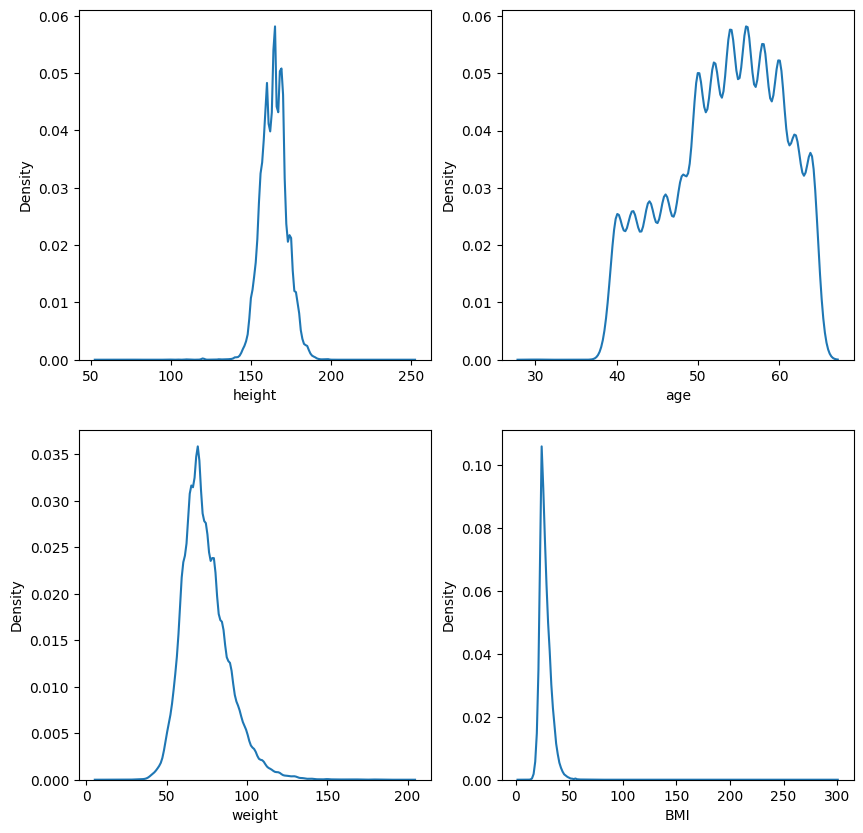

In [14]:

import seaborn as sns
import matplotlib.pyplot as plt
#x = mrg_base_df.height.mean()
#y = mrg_base_df.height.std()
#mrg_base_df[mrg_base_df.height > (x+(2*y))]
#sns.boxplot(mrg_base_df, x='smoke', y='height')
col = ['height', 'weight', 'age', 'BMI']
fig, axes = plt.subplots(2,2, figsize=(10,10))
for cl in col:
    num = col.index(cl)
    sns.kdeplot(base_df, x=cl, ax=axes[num%2, num//2])

[0 1]


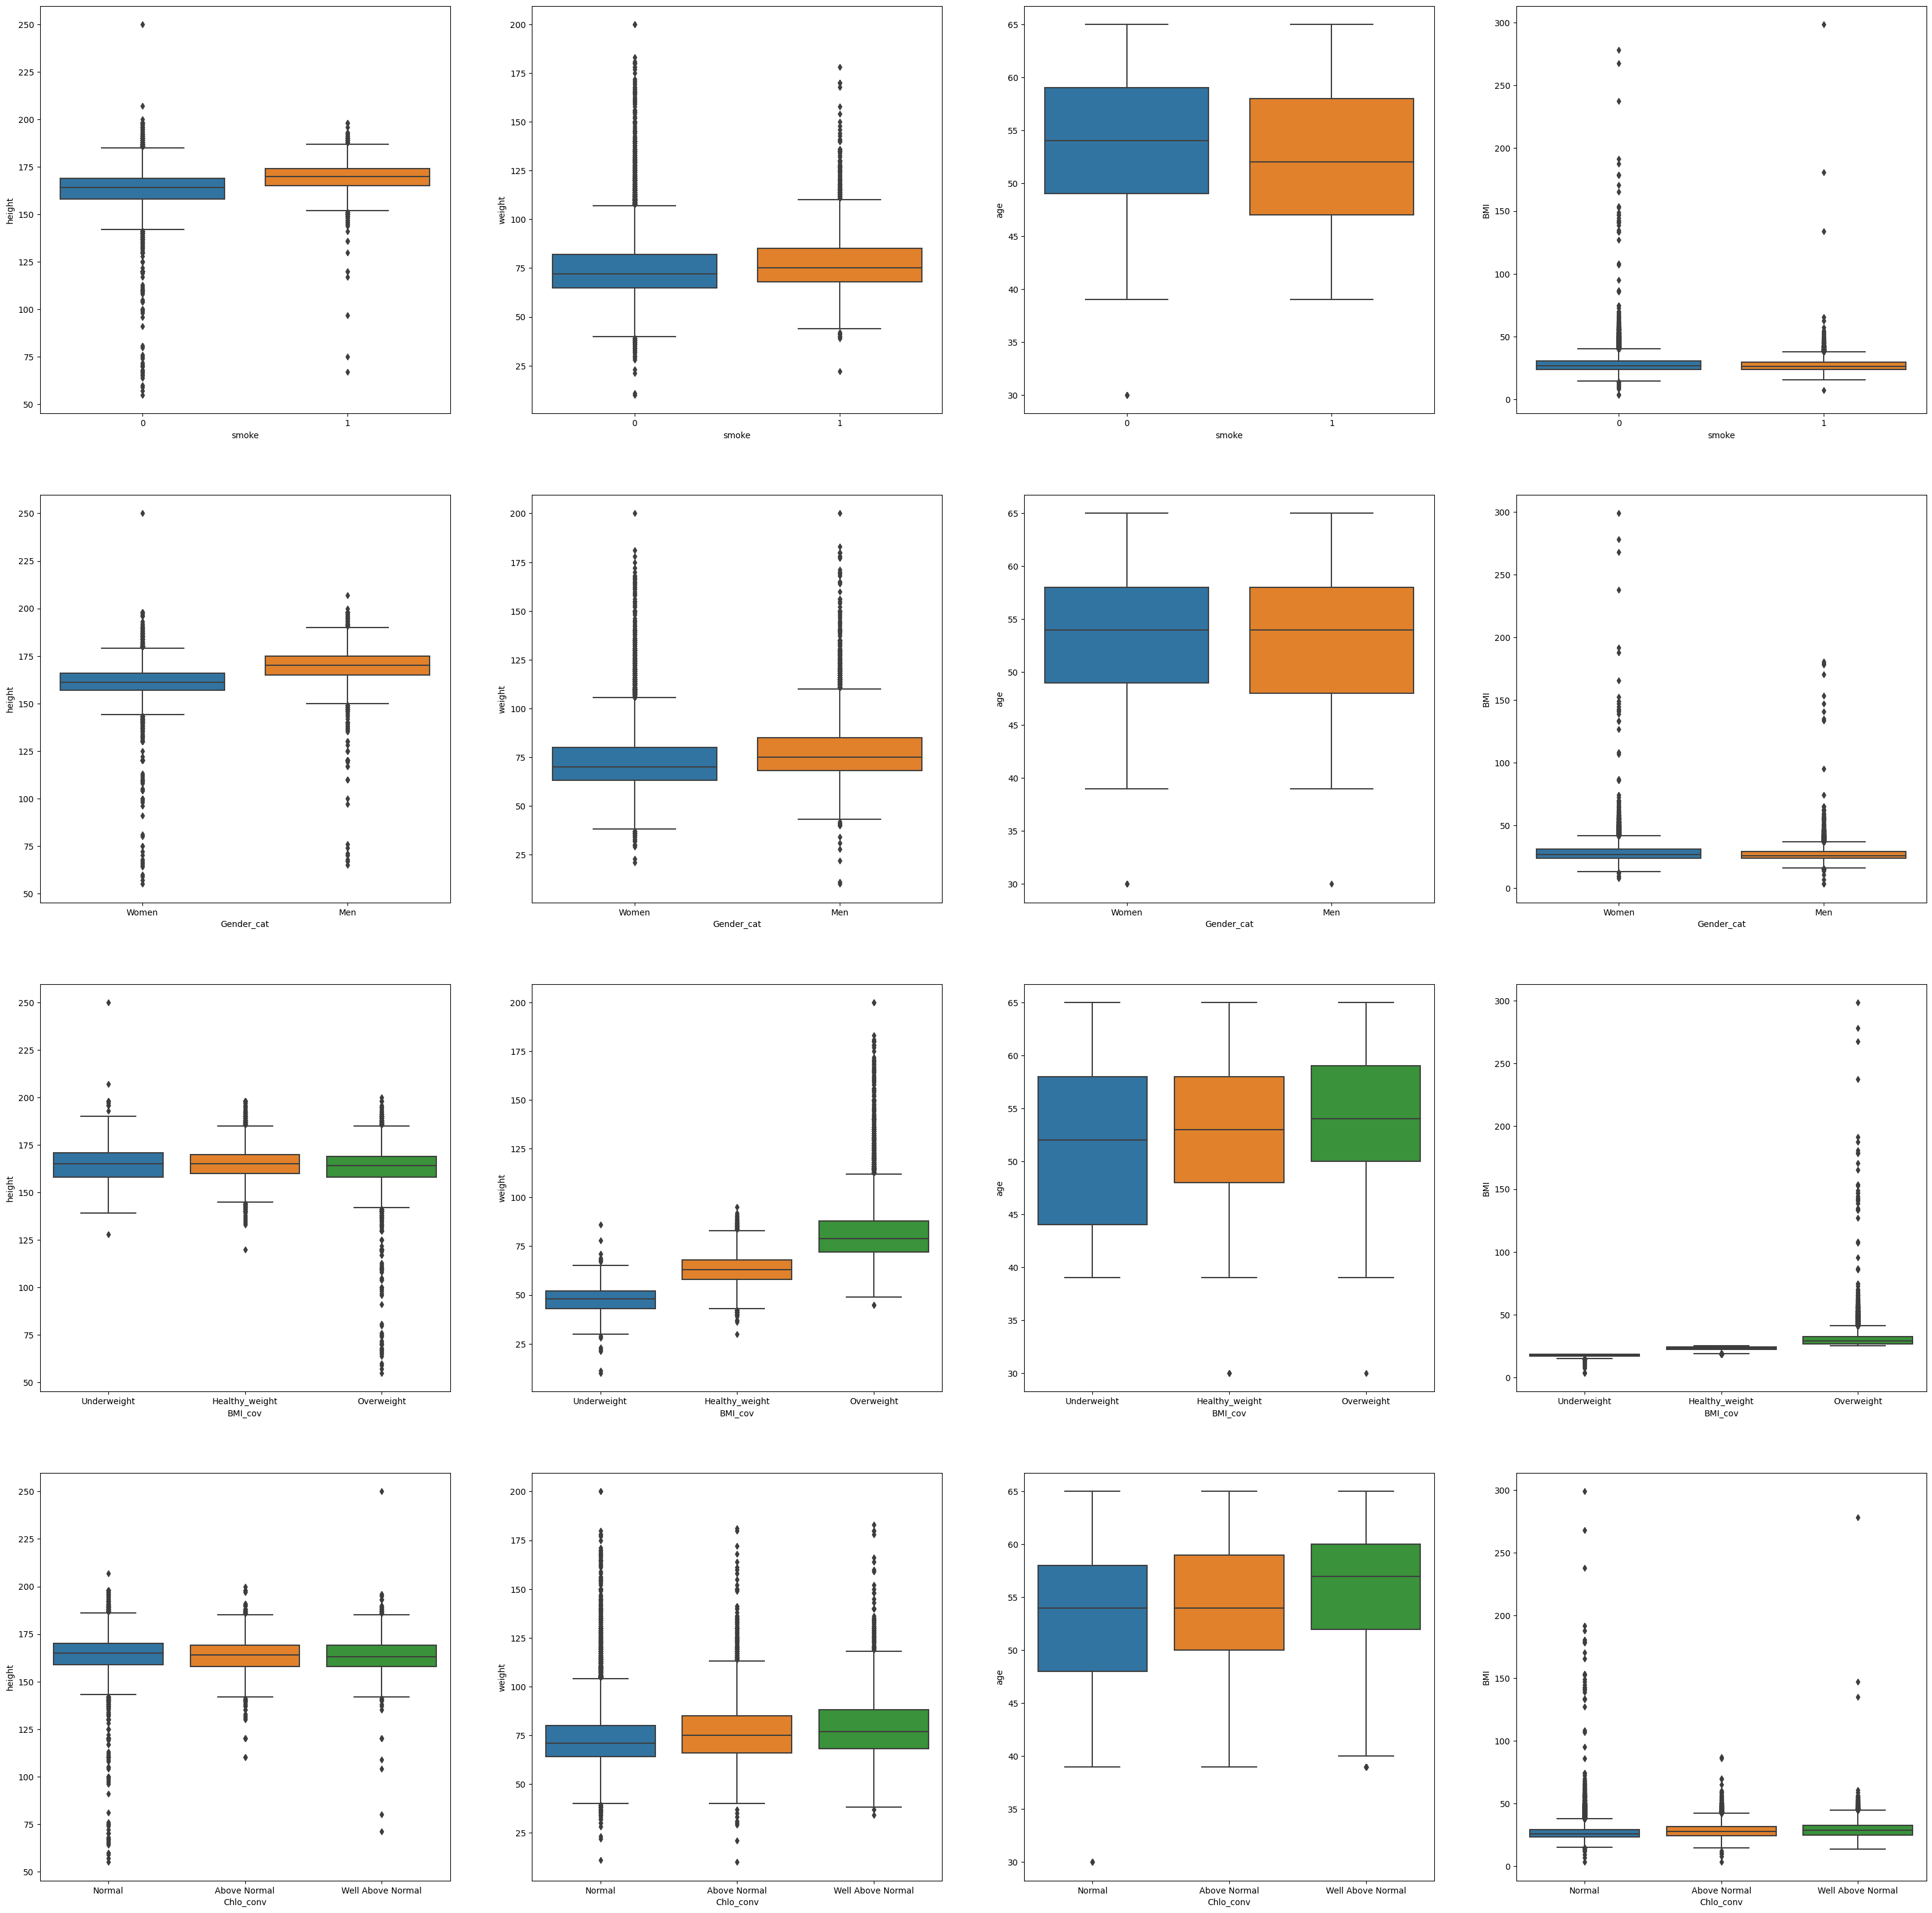

In [15]:
print(base_df.smoke.unique())
import seaborn as sns
import matplotlib.pyplot as plt
fig, axes = plt.subplots(4,4, figsize=(40,40))
for cl in col:
    num = col.index(cl)
    sns.boxplot(base_df, x='smoke', y=cl, ax=axes[0, num%4])


col = ['height', 'weight', 'age', 'BMI']
for cl in col:
    num = col.index(cl)
    sns.boxplot(base_df, x='Gender_cat', y=cl, ax=axes[1, num%4])


for cl in col:
    num = col.index(cl)
    sns.boxplot(base_df, x='BMI_cov', y=cl, ax=axes[2, num % 4])


for cl in col:
    num = col.index(cl)
    sns.boxplot(base_df, x='Chlo_conv', y=cl, ax=axes[3,num % 4])


age
30      0
39     30
40    134
41     39
42    147
43     33
44    142
45     39
46    159
47     33
48    149
49     50
50    245
51     63
52    237
53     70
54    248
55     62
56    244
57     59
58    251
59     55
60    191
61     41
62    146
63     24
64    137
65     13
Name: alco, dtype: int64
age
30      0
39     44
40    275
41     93
42    303
43     78
44    317
45     91
46    327
47     69
48    342
49    100
50    472
51    113
52    491
53    129
54    474
55    126
56    529
57    117
58    432
59     97
60    397
61     86
62    340
63     61
64    244
65     22
Name: smoke, dtype: int64


<AxesSubplot: xlabel='age'>

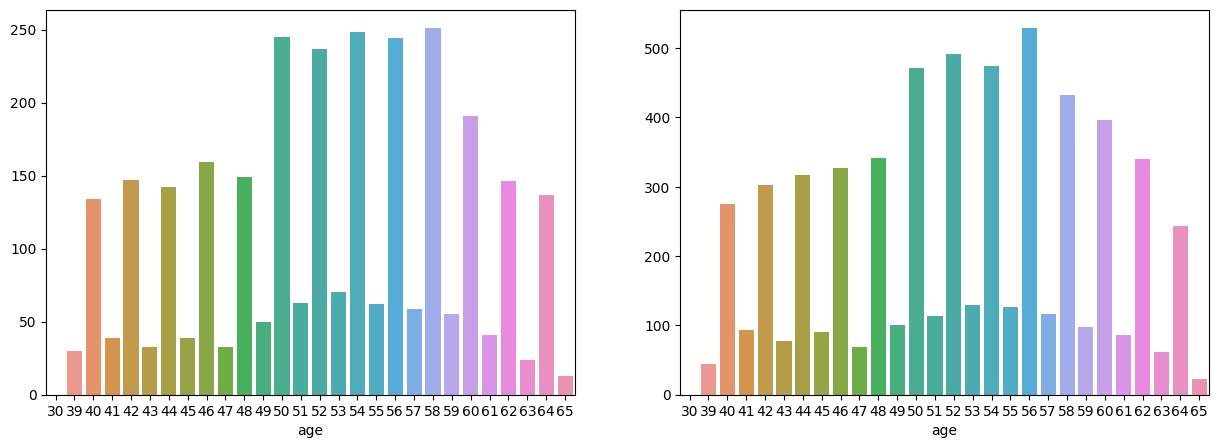

In [16]:
fg, axs =plt.subplots(1,2, figsize=(15,5))
h =mrg_base_df.groupby('age').alco.sum()
print(h)
sns.barplot(x=h.index, y=h.values, ax=axs[0])

i =base_df.groupby('age').smoke.sum()
print(i)
sns.barplot(x=i.index, y=i.values, ax=axs[1])

### To check for correlated features, let's plot a heatmap using the 'corr' method:

/tmp/ipykernel_20/1181048037.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlated_features = mrg_base_df.corr(method = 'spearman')


<AxesSubplot: >

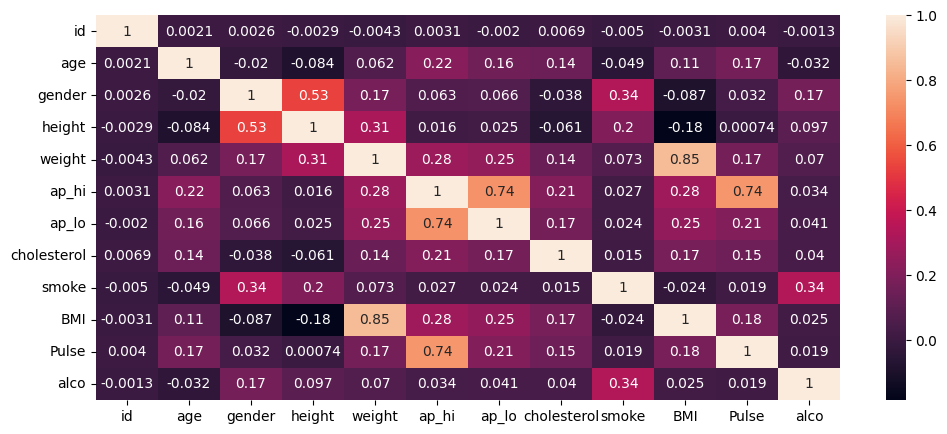

In [17]:
plt.figure(figsize=(12,5))
correlated_features = mrg_base_df.corr(method = 'spearman')
sns.heatmap(correlated_features, annot=True)

*To be continued.......*